题目一

In [101]:
import numpy as np
import pandas as pd
import warnings

In [102]:
data=pd.read_excel('sz50.xlsx',sheetname=None, index_col='datetime')

In [103]:
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [112]:
type(data)

collections.OrderedDict

题目二

In [12]:
s60036=pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')

In [26]:
import talib as ta

print(ta.MA(s60036.close.values, 10)[-5:])

[108.35  108.741 109.176 110.102 111.666]


In [68]:
type(s60036)

pandas.core.frame.DataFrame

In [27]:
type(ta.MA(s60036.close.values, 10)[-5:])

numpy.ndarray

题目三

In [28]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
k=ta.MA(s60036.close.values, 10)

In [53]:
MM=pd.Series(k,index=data['600036.XSHG'].index)

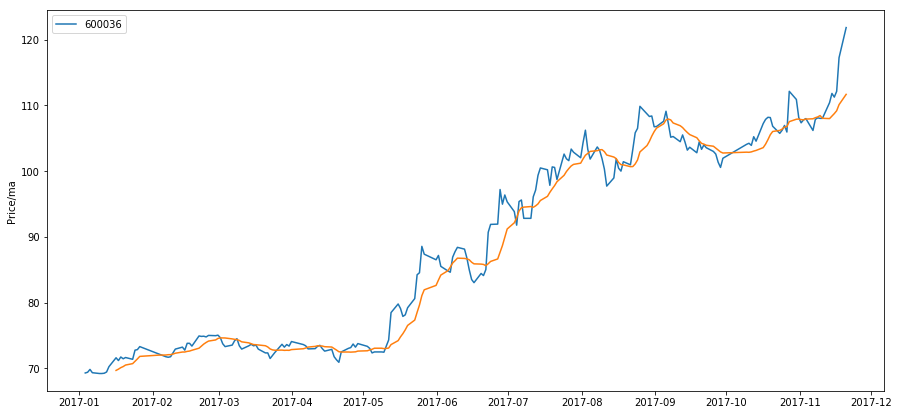

In [55]:
plt.figure(figsize=(15, 7))
plt.plot(s60036.close)
plt.plot(MM)
plt.ylabel('Price/ma')
plt.legend(['600036'])
plt.show()

题目四

In [131]:
import talib as ta
import xlrd

from pandas import DataFrame

In [140]:
data_dic={}
for i in data.keys():
    try:
        data02=pd.read_excel('sz50.xlsx',sheetname=i, index_col='datetime')
        data_dic[i]=data02["close"]
    except:
        pass
dtt = pd.DataFrame(data_dic)
type(data_dic)

dict

In [158]:
dict_ROCR100={}
for i in data_dic.keys():
    dict_ROCR100[i]=ta.ROCR100(data_dic[i],timeperiod=20) 

In [164]:
ROCR100 = pd.DataFrame(dict_ROCR100, index = dtt.index)

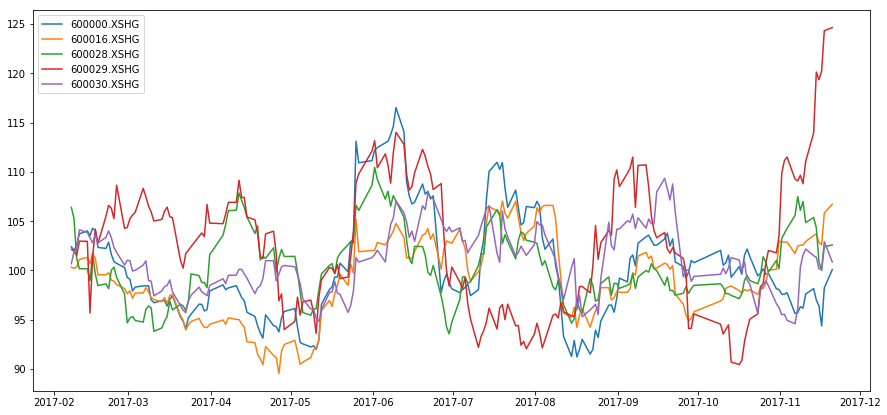

In [179]:
plt.figure(figsize=(15,7))
plt.plot(dict_ROCR100["600000.XSHG"])
plt.plot(dict_ROCR100["600016.XSHG"])
plt.plot(dict_ROCR100["600028.XSHG"])
plt.plot(dict_ROCR100["600029.XSHG"])
plt.plot(dict_ROCR100["600030.XSHG"])

plt.legend(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG'])
plt.show()

题目五

In [180]:
from datetime import datetime
import pandas as pd

In [191]:
w_dict = {}
for s in data.keys():
    ww= pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    w_dict[s] = ww.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(w_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 50 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600000.XSHG to 601989.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [185]:
import talib.abstract as ta

In [192]:
PN=PN.fillna(0)

In [194]:
pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)

                                      macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600485.XSHG   0.000000    0.000000   0.000000
          